#Imports

In [92]:
# general imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col

# definition cronbachs alpha
def cronbach (data):
  k=data.shape [1]
  varX=data.sum(axis=1).var()
  sumVar=data.var(axis=0).sum()
  return k/(k-1)*(1-sumVar/varX)

# imports for panel regression
!pip install linearmodels
from linearmodels import PanelOLS

# imports Regressors
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# imports Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# imports model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# imports metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# imports inspection
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import plot_partial_dependence

# import dataframe
path_to_df = 'https://raw.githubusercontent.com/armoutihansen/EEMP2021/main/datasets/AMP_Data.csv'
df = pd.read_csv(path_to_df)

#General

In [93]:
# prints help for every python function
help(df.head)

Help on method head in module pandas.core.generic:

head(n: int = 5) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `n` rows, equivalent to ``df[:-n]``.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     falcon
  

In [94]:
# square a number in python
4**2

16

In [95]:
# logarithm with a base of e (natürliche Logarithmus (ln))
np.log(100)

4.605170185988092

In [96]:
# logarithm with a base of 10 (log)
np.log10(100)

2.0

In [97]:
# if statement
if 4**2 == 16:
  print("Correct")

Correct


In [98]:
# example for a python list
l1 = [i for i in range(10)]
print(l1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [99]:
# access a list in python
print(l1[2])
print(l1[3:7])

2
[3, 4, 5, 6]


In [100]:
# example for loop
result = 0
for number in range(0, 10, 2):
  result += number
  print(result)

0
2
6
12
20


In [101]:
# define an empty list named pred_list
pred_liste = []

In [102]:
# store results in a list
# define an empty list
pred_liste = []
# run a for loop
for i in range(100):
  pred_liste.append(1+i)
print(pred_liste)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


#Basics, Exploratory Data Analysis and Descriptive Statistics

In [103]:
# gives back the #rows and #columns
df.shape

(7094, 49)

In [104]:
# gives back all columns
df.columns

Index(['Unnamed: 0', 'account_id', 'd5sales', 'factor_management', 'ldegree_t',
       'lean1', 'lean2', 'management', 'mne_country', 'mne_d', 'mne_f',
       'ownership', 'perf1', 'perf2', 'perf3', 'perf4', 'perf5', 'perf6',
       'perf7', 'perf8', 'perf9', 'perf10', 'roce', 'talent1', 'talent2',
       'talent3', 'talent4', 'talent5', 'talent6', 'dead', 'year', 'sic',
       'country', 'analyst', 'dow', 'reliability', 'i_comptenure',
       'i_seniority', 'duration', 'hour', 'duration_miss', 'reliability_miss',
       'i_seniority_miss', 'i_comptenure_miss', 'hour_miss', 'ldegree_t_miss',
       'sales', 'emp', 'ppent'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7094 non-null   int64  
 1   account_id         7094 non-null   int64  
 2   d5sales            7094 non-null   float64
 3   factor_management  6339 non-null   float64
 4   ldegree_t          7094 non-null   float64
 5   lean1              7088 non-null   float64
 6   lean2              6778 non-null   float64
 7   management         7094 non-null   float64
 8   mne_country        1996 non-null   object 
 9   mne_d              7094 non-null   int64  
 10  mne_f              7094 non-null   int64  
 11  ownership          6369 non-null   object 
 12  perf1              7091 non-null   float64
 13  perf2              7087 non-null   float64
 14  perf3              7079 non-null   float64
 15  perf4              6951 non-null   float64
 16  perf5              7050 

In [106]:
#print summary statistics for all variables
df.describe()

,Unnamed: 0,account_id,d5sales,factor_management,ldegree_t,lean1,lean2,management,mne_d,mne_f,perf1,perf2,perf3,perf4,perf5,perf6,perf7,perf8,perf9,perf10,roce,talent1,talent2,talent3,talent4,talent5,talent6,dead,year,sic,dow,reliability,i_comptenure,i_seniority,duration,hour,duration_miss,reliability_miss,i_seniority_miss,i_comptenure_miss,hour_miss,ldegree_t_miss,sales,emp,ppent
count,7094.000000,7094.000000,7094.000000,6.339000e+03,7094.000000,7088.000000,6778.000000,7094.000000,7094.000000,7094.000000,7091.000000,7087.000000,7079.000000,6951.000000,7050.000000,7079.000000,7058.000000,7067.000000,7055.000000,7066.000000,7094.000000,7063.000000,7070.000000,7072.000000,7054.000000,7015.000000,7030.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7.094000e+03,7094.000000,7.094000e+03
mean,3546.500000,1551.718495,0.388065,-3.634122e-10,1.654528,2.915587,3.044729,3.028539,0.130815,0.150550,3.243092,3.485696,3.441309,3.268542,3.201649,3.062345,3.107316,3.100540,3.082675,2.654746,15.501877,2.510310,2.579682,3.110359,3.065573,3.126320,2.545659,0.019171,2007.218354,318.806597,3.003947,7.928833,13.508317,3.010008,51.839046,11.932976,0.009445,0.113617,0.014801,0.008599,0.012828,0.240767,2.321173e+05,838.091474,5.617232e+04
std,2048.005737,844.828960,0.685697,9.673381e-01,1.348144,1.026907,1.063318,0.617150,0.337221,0.357635,0.941357,0.908641,0.890111,0.912957,0.898450,1.001558,0.950016,1.028695,0.865997,0.921847,15.496780,0.925412,0.940687,0.912678,0.875357,0.838678,0.930378,0.137136,1.697012,81.655731,1.411813,1.411983,9.762794,0.907873,13.663377,3.411526,0.096730,0.317368,0.120765,0.092337,0.112539,0.427579,7.845582e+05,2868.252430,2.068146e+05
min,0.000000,1.000000,-3.424057,-3.119071e+00,-3.912023,1.000000,1.000000,1.055556,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2002.000000,13.000000,-1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.999999e+00,1.000000,2.000000e+00
25%,1773.250000,843.000000,0.083343,-6.331378e-01,0.000000,2.000000,2.500000,2.611111,0.000000,0.000000,2.500000,3.000000,3.000000,3.000000,3.000000,2.333333,2.500000,2.333333,2.500000,2.000000,5.352240,2.000000,2.000000,2.500000,2.500000,2.750000,2.000000,0.000000,2006.000000,272.000000,2.000000,7.000000,6.000000,3.000000,43.750000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.667450e+04,153.999980,4.045750e+03
50%,3546.500000,1546.500000,0.381458,2.183453e-02,1.841011,3.000000,3.000000,3.055556,0.000000,0.000000,3.000000,3.500000,3.500000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.750000,12.321658,2.500000,2.500000,3.000000,3.000000,3.000000,2.500000,0.000000,2007.000000,331.000000,3.000000,8.000000,11.000000,3.000000,50.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.294649e+04,265.000060,1.170200e+04
75%,5319.750000,2330.000000,0.684512,6.700109e-01,2.712566,4.000000,4.000000,3.444444,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,23.261284,3.000000,3.000000,4.000000,3.750000,4.000000,3.000000,0.000000,2009.000000,361.000000,4.000000,9.000000,20.000000,4.000000,60.000000,14.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.682538e+05,613.749970,3.470026e+04
max,7093.000000,2927.000000,3.173111,2.797896e+00,4.605170,5.000000,5.000000,4.888889,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,50.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,2010.000000,999.000000,6.000000,10.000000,50.000000,5.000000,130.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.606754e+07,65681.980000,4.266051e+06


In [107]:
# print the first few rows of df
df.head()

,Unnamed: 0,account_id,d5sales,factor_management,ldegree_t,lean1,lean2,management,mne_country,mne_d,mne_f,ownership,perf1,perf2,perf3,perf4,perf5,perf6,perf7,perf8,perf9,perf10,roce,talent1,talent2,talent3,talent4,talent5,talent6,dead,year,sic,country,analyst,dow,reliability,i_comptenure,i_seniority,duration,hour,duration_miss,reliability_miss,i_seniority_miss,i_comptenure_miss,hour_miss,ldegree_t_miss,sales,emp,ppent
0,0,1,0.374976,0.634742,0.000000,3.0,3.0,3.500000,NaN,0,0,NaN,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,16.096558,3.0,4.0,4.0,4.0,3.0,3.0,0,2004,382,United States,Jayesh Patel,3,7.0,5,4,46.0,18.0,0,1,0,0,0,1,88585.01,403.00003,10828.998
1,1,1,0.626065,0.460456,0.000000,4.0,4.0,3.333333,NaN,0,0,NaN,4.0,3.5,4.0,3.0,4.0,3.5,4.0,2.5,3.0,2.5,21.183670,2.0,3.0,4.0,3.5,2.5,3.0,0,2005,382,United States,Jayesh Patel,3,7.0,6,4,53.0,18.0,0,1,0,0,0,1,116900.99,405.00003,9241.004
2,2,1,0.032071,0.286170,4.366278,5.0,5.0,3.166667,NaN,0,0,Dispersed Shareholders,4.0,4.0,4.0,3.0,4.0,3.0,4.0,1.0,3.0,2.0,15.725327,1.0,2.0,4.0,3.0,2.0,3.0,0,2006,382,United States,May Yoon,4,10.0,6,3,60.0,18.0,0,0,0,0,0,0,103448.01,410.00000,8946.000
3,3,2,0.227196,2.285633,0.000000,4.5,4.5,4.555555,NaN,0,0,NaN,4.0,5.0,5.0,5.0,4.5,4.0,4.5,4.0,4.5,5.0,18.092280,4.5,5.0,4.5,5.0,4.5,4.0,0,2004,281,United States,Michael Bevan,4,8.0,10,4,40.0,15.0,0,0,0,0,0,1,246291.10,670.99994,69757.984
4,4,3,0.213310,1.911630,0.000000,3.5,4.0,4.333333,NaN,0,0,NaN,4.5,5.0,5.0,5.0,4.0,4.0,3.5,4.5,5.0,5.0,27.606136,4.0,3.0,4.0,4.5,5.0,4.5,0,2004,366,United States,Michael Bevan,1,7.0,4,3,60.0,14.0,0,1,0,0,0,1,454517.12,1627.00000,89360.970


In [108]:
# gives back the values of a certain column
print(sorted(df['country'].unique()))

['Argentina', 'Australia', 'Brazil', 'Canada', 'Chile', 'China', 'France', 'Germany', 'Great Britain', 'Greece', 'Italy', 'Japan', 'Northern Ireland', 'Poland', 'Portugal', 'Republic of Ireland', 'Sweden', 'United States']


In [109]:
# gives back the distribution of certain values
# exchanging value_counts() with value_counts(normalize=True) shows percentages
print(df['country'].value_counts())

Great Britain          1628
France                  873
Sweden                  631
Portugal                601
China                   575
Poland                  499
United States           489
Italy                   480
Greece                  441
Germany                 423
Japan                   230
Northern Ireland        118
Republic of Ireland      89
Australia                10
Chile                     2
Argentina                 2
Brazil                    2
Canada                    1
Name: country, dtype: int64


In [110]:
#print summary statistics for one specific variable
df.management.describe()

count    7094.000000
mean        3.028539
std         0.617150
min         1.055556
25%         2.611111
50%         3.055556
75%         3.444444
max         4.888889
Name: management, dtype: float64

In [111]:
#compute mean 
df.management.mean()

3.0285393105028446

In [112]:
#compute standard deviation
df.management.std()

0.6171499955657294

In [113]:
# distribution of a specific column
print(df['dead'].value_counts(normalize=True))

0    0.980829
1    0.019171
Name: dead, dtype: float64


In [114]:
#explore summary statistics for specific subgroups (rows)
df.groupby('year').management.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2002,16.0,3.275735,0.542419,2.470588,3.058824,3.176471,3.529412,4.352941
2003,12.0,3.382761,0.644699,2.514706,2.651552,3.545752,3.790441,4.315359
2004,505.0,3.215423,0.771038,1.055556,2.666667,3.222222,3.777778,4.888889
2005,325.0,3.190338,0.555268,1.305556,2.847222,3.166667,3.569444,4.569444
2006,1888.0,2.983861,0.663595,1.055556,2.555556,3.000000,3.444444,4.833333
2007,1201.0,2.953897,0.568405,1.277778,2.569444,2.944444,3.333333,4.583333
2008,1336.0,2.990968,0.584837,1.111111,2.583333,3.000000,3.388889,4.888889
2009,1039.0,3.041375,0.538601,1.343137,2.700504,3.055556,3.416667,4.388889
2010,772.0,3.100676,0.593393,1.111111,2.722222,3.166667,3.500000,4.555555


In [115]:
# print mean of one variable dependent on another variable
mean_mgm_score_by_cou = df['management'].groupby(df['country']).mean()
print(mean_mgm_score_by_cou)

country
Argentina              3.055555
Australia              2.961111
Brazil                 2.694444
Canada                 3.055556
Chile                  3.083333
China                  2.743358
France                 3.061611
Germany                3.248466
Great Britain          3.069062
Greece                 2.778438
Italy                  2.983833
Japan                  3.384669
Northern Ireland       2.865231
Poland                 2.900754
Portugal               2.810406
Republic of Ireland    2.875156
Sweden                 3.208064
United States          3.318126
Name: management, dtype: float64


In [116]:
#print correlation matrix
df.corr()

,Unnamed: 0,account_id,d5sales,factor_management,ldegree_t,lean1,lean2,management,mne_d,mne_f,perf1,perf2,perf3,perf4,perf5,perf6,perf7,perf8,perf9,perf10,roce,talent1,talent2,talent3,talent4,talent5,talent6,dead,year,sic,dow,reliability,i_comptenure,i_seniority,duration,hour,duration_miss,reliability_miss,i_seniority_miss,i_comptenure_miss,hour_miss,ldegree_t_miss,sales,emp,ppent
Unnamed: 0,1.000000,0.998582,0.024224,0.006425,0.268350,-0.022946,-0.022908,-0.031980,-0.026240,0.047721,0.018271,0.000034,0.027992,-0.010092,-0.015356,0.083614,-0.002615,0.032084,0.020340,-0.152762,-0.067722,-0.051124,-0.157568,-0.023487,-0.010654,0.043836,-0.118497,-0.009704,0.271395,-0.023166,-0.006625,0.270398,0.108069,-0.054174,0.230448,-0.061850,-0.020513,-0.348621,-0.024997,0.030433,-0.032785,-0.315595,-0.072135,-0.114212,-0.034404
account_id,0.998582,1.000000,0.026838,0.000463,0.274594,-0.028701,-0.027502,-0.037935,-0.030186,0.046953,0.013554,-0.007189,0.020133,-0.015901,-0.020433,0.082391,-0.008118,0.028175,0.018321,-0.150753,-0.074122,-0.054913,-0.155794,-0.029478,-0.016642,0.040293,-0.119851,-0.008431,0.279545,-0.028057,-0.005340,0.262290,0.111352,-0.057091,0.228895,-0.072250,-0.018864,-0.357384,-0.023398,0.032700,-0.030539,-0.322031,-0.076478,-0.118393,-0.037169
d5sales,0.024224,0.026838,1.000000,0.003278,0.044894,-0.027464,-0.011178,0.007215,0.017630,0.034998,-0.016296,-0.004189,-0.005040,-0.001709,-0.043284,0.042015,0.006421,0.015893,0.017994,-0.014869,0.189011,0.028203,0.054581,-0.005677,0.005141,0.054833,-0.003132,-0.056406,-0.139644,-0.036668,0.010465,-0.024934,-0.073288,-0.022970,-0.052078,-0.071053,0.002355,-0.039097,0.016236,-0.020799,-0.006904,-0.033420,0.056570,0.033119,0.031535
factor_management,0.006425,0.000463,0.003278,1.000000,0.125256,0.751960,0.674642,0.995956,-0.001782,0.138406,0.746721,0.716449,0.768658,0.777613,0.717277,0.677117,0.760740,0.667909,0.647949,0.564919,0.094105,0.635224,0.538393,0.450640,0.654948,0.602156,0.403016,-0.062489,-0.017845,0.081614,-0.009696,0.310961,0.041652,-0.024400,0.197418,0.051185,-0.027883,0.063331,-0.016180,-0.025162,0.026722,0.036981,0.156533,0.105684,0.115340
ldegree_t,0.268350,0.274594,0.044894,0.125256,1.000000,0.065637,0.038940,0.113634,0.062435,0.107534,0.107029,0.053717,0.101454,0.076352,0.041840,0.101771,0.117789,0.098130,0.062138,0.046722,-0.020050,0.110070,0.115349,0.032142,0.071253,0.131038,-0.007433,-0.072791,0.292652,0.029634,0.008400,0.175476,0.065029,-0.056526,0.153449,-0.124223,0.008863,-0.408627,0.011864,-0.011593,-0.038615,-0.691161,-0.013340,-0.046782,0.009734
lean1,-0.022946,-0.028701,-0.027464,0.751960,0.065637,1.000000,0.744474,0.725990,0.003772,0.124499,0.602477,0.548662,0.525924,0.528107,0.458517,0.429888,0.490278,0.431056,0.414677,0.372067,0.077641,0.400423,0.324361,0.256786,0.395123,0.345232,0.244639,-0.047343,0.008904,0.113649,-0.014907,0.253514,0.003994,0.012202,0.149239,0.048212,-0.006524,0.051951,-0.008685,-0.026677,0.021901,0.047900,0.145020,0.108122,0.105934
lean2,-0.022908,-0.027502,-0.011178,0.674642,0.038940,0.744474,1.000000,0.665120,0.004536,0.086286,0.497112,0.464093,0.461545,0.468710,0.424945,0.386143,0.443646,0.369789,0.376560,0.323654,0.068927,0.361156,0.274357,0.219827,0.334773,0.329071,0.229152,-0.029088,-0.033039,0.078992,-0.024409,0.212517,-0.001455,0.005779,0.153199,0.047550,-0.003713,0.076574,-0.005938,-0.007138,0.018639,0.056476,0.105548,0.080705,0.079651
management,-0.031980,-0.037935,0.007215,0.995956,0.113634,0.725990,0.665120,1.000000,0.003085,0.133809,0.725208,0.697312,0.741573,0.751873,0.710023,0.672828,0.747698,0.671851,0.653229,0.603574,0.097759,0.657274,0.579537,0.499116,0.660090,0.627825,0.461851,-0.062139,-0.026543,0.085485,-0.013883,0.292599,0.029769,-0.020951,0.174312,0.042173,-0.022769,0.089892,-0.008937,-0.014133,0.016109,0.055309,0.150895,0.115830,0.121667
mne_d,-0.026240,-0.030186,0.017630,-0.001782,0.062435,0.003772,0.004536,0.003085,1.000000,-0.163321,0.007846,0.017237,0.013700,0.003314,0.011979,-0.017736,0.005996,0.020547

In [117]:
#show correlation between two variables
df.filter(items=['management', 'roce']).corr()

,management,roce
management,1.000000,0.097759
roce,0.097759,1.000000


In [118]:
#show correlation between all variables starting with "talent"
df.filter(regex='talent*').corr()

,talent1,talent2,talent3,talent4,talent5,talent6
talent1,1.000000,0.439353,0.307364,0.482545,0.449344,0.349100
talent2,0.439353,1.000000,0.318955,0.442559,0.398396,0.319221
talent3,0.307364,0.318955,1.000000,0.390328,0.333285,0.274182
talent4,0.482545,0.442559,0.390328,1.000000,0.489967,0.336119
talent5,0.449344,0.398396,0.333285,0.489967,1.000000,0.395029
talent6,0.349100,0.319221,0.274182,0.336119,0.395029,1.000000


In [119]:
# create a new vairable
df['china_dummy'] = df['country'] == 'China'

In [120]:
#create a new variable that computes the average of all talent variables
#mean function: axis=0 --> rows/observations; axis=1 --> columns/variables
df['talent'] = df.filter(regex='talent*').mean(axis=1)
print(df.talent)

0       3.500000
1       3.000000
2       2.500000
3       4.583333
4       4.166667
          ...   
7089    3.458333
7090    3.583333
7091    3.708333
7092    3.833333
7093    2.833333
Name: talent, Length: 7094, dtype: float64


In [121]:
#standarize variables
df['tal_std']= (df.talent-df.talent.mean()/df.talent.std())
print(df.tal_std)

0      -0.986452
1      -1.486452
2      -1.986452
3       0.096881
4      -0.319785
          ...   
7089   -1.028119
7090   -0.903119
7091   -0.778119
7092   -0.653119
7093   -1.653119
Name: tal_std, Length: 7094, dtype: float64


In [122]:
#cronbach's alpha function
# Cronbach's alpha is frequently applied measure for the internal consistency of a scale
# good internal consistency if alpha > 0.8

def cronbach(data):
  k=data.shape[1]
  varX=data.var(axis=0).sum()
  return k/(k-1)*(1-sumVar/varX)

#Graphs & Plots

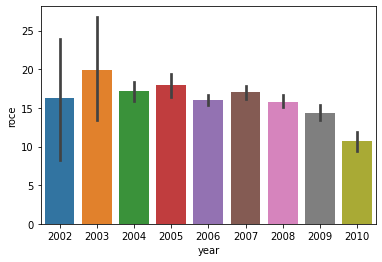

In [123]:
#prints a barplot
sns.barplot(x='year', y='roce', data=df)
plt.show();
# 95 % confidence bands are included

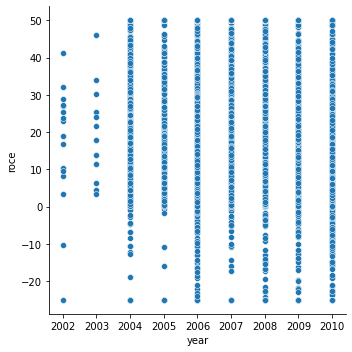

In [124]:
#prints a scatter plot where each dot is a data point
sns.relplot (x='year', y='roce',data=df)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


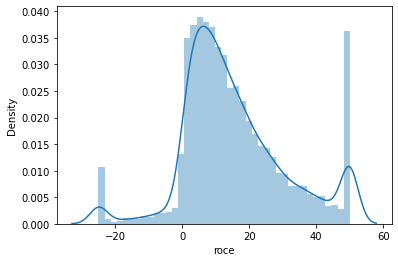

In [125]:
#prints a histogram
sns.distplot(df['roce'])
plt.show();

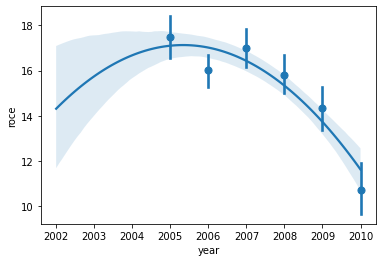

In [126]:
#prints a scatter plot with a gression line; x_bins changes the amount of blue dots; order= u-shape vs s-shape
sns.regplot(y='roce',x='year', data=df, x_bins=10, order=2)
plt.show();

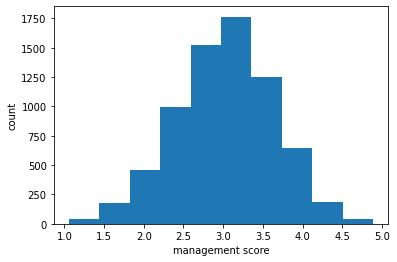

In [127]:
# plot histogram
plt.hist(df['management'])
plt.xlabel('management score')
plt.ylabel('count')
plt.show();

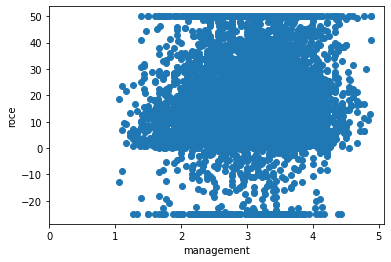

In [128]:
# plot Scatter plot 
plt.scatter(df['management'],df['roce'])
plt.xlim(0,)
plt.xlabel('management')
plt.ylabel('roce')
plt.show();

#Simulate a Data Set

In [129]:

#Simulate a data set

#n = number of observations
n = 100

#create a DataFrame with n rows
df2=pd.DataFrame(index=range(n))

#create a colum x that is a vector of n normally distributed random variables
# in this case: 100= mean, 15 = standard deviation
df2['x']=np.random.normal(100,15,n)
#create a column y to a Cconditional expectation function (CEF) that looks like this --> y = 200 + 2x
# second part of the equotion is the noise with a mean of 0 and a std of 500
df2['y']=200+2*df2['x'] + np.random.normal(0,500,n)
df2

,x,y
0,82.212407,426.872353
1,93.025987,163.416390
2,99.970081,245.160080
3,120.067884,915.623088
4,117.996035,1351.174088
...,...,...
95,87.237653,1104.469324
96,79.759418,1190.868635
97,111.366564,181.965405
98,119.634288,1157.349272


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


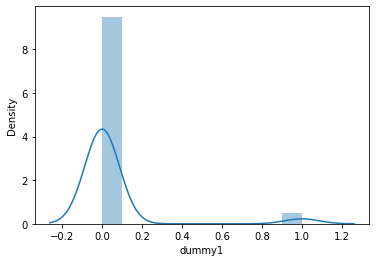

In [130]:
#create a dummy variable which takes value 1 for 5 % randomly chosen individuals
n = 100
df2['dummy1']=np.random.binomial(1, 0.05,n)
sns.distplot(df2['dummy1'])
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


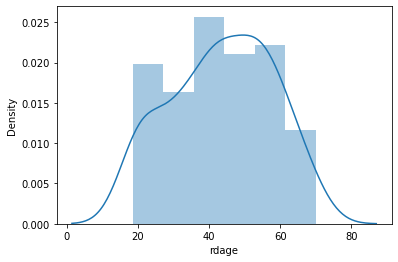

In [131]:
#generate a uniformally distributed random variable named rdage
df2['rdage'] = np.random.uniform(18, 70, size =n)
sns.distplot(df2['rdage'])
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


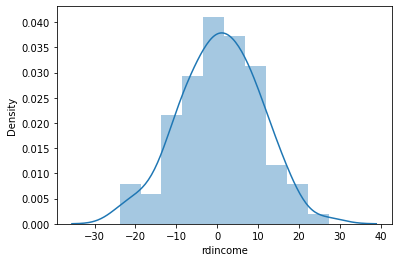

In [132]:
#generate a uniformally distributed random variable named rdincome
df2['rdincome'] = np.random.normal(0, 10, size =n)
sns.distplot(df2['rdincome'])
plt.show();

#Data Manipulation

In [133]:
# remove missing values from a DataFrame
df_new = df.dropna()

In [134]:
# drop columns
df_new = df_new.drop(columns=['dead','year'])

In [135]:
# create a new dataframe with certain columns
# create a variable that contains the columns --> cols
cols = ['roce','lean1','lean2','perf1','perf2','perf3','perf4',
        'perf5','perf6','perf7','perf8','perf9','perf10','talent1','talent2',
        'talent3','talent4','talent5','talent6']

df_certain_cols = df[cols]

In [136]:
#create a dummy variable with a certain condition
# == --> equals
#other possible operators: <, >, >=, <=, !=
df['dummy_2006'] = (df['year']== 2006)
# creates a dummy variable with only zeros
df['dummy_test'] = 0 

In [137]:
#select specific columns of the data
df['management']

0       3.500000
1       3.333333
2       3.166667
3       4.555555
4       4.333333
          ...   
7089    3.583333
7090    3.611111
7091    3.638889
7092    3.666667
7093    2.722222
Name: management, Length: 7094, dtype: float64

In [138]:
#select a column if it satisfies a certain condition
df[df['year']==2006]

,Unnamed: 0,account_id,d5sales,factor_management,ldegree_t,lean1,lean2,management,mne_country,mne_d,mne_f,ownership,perf1,perf2,perf3,perf4,perf5,perf6,perf7,perf8,perf9,perf10,roce,talent1,talent2,talent3,talent4,talent5,talent6,dead,year,sic,country,analyst,dow,reliability,i_comptenure,i_seniority,duration,hour,duration_miss,reliability_miss,i_seniority_miss,i_comptenure_miss,hour_miss,ldegree_t_miss,sales,emp,ppent,china_dummy,talent,tal_std,dummy_2006,dummy_test
2,2,1,0.032071,0.286170,4.366278,5.0,5.0,3.166667,NaN,0,0,Dispersed Shareholders,4.0,4.0,4.0,3.0,4.0,3.0,4.0,1.0,3.0,2.0,15.725327,1.0,2.0,4.0,3.0,2.0,3.0,0,2006,382,United States,May Yoon,4,10.0,6,3,60.0,18.0,0,0,0,0,0,0,103448.01,410.0000,8946.000,False,2.500000,-1.986452,True,0
12,12,7,0.623507,2.211046,2.660259,5.0,5.0,4.444445,US,1,0,"Family owned, family CEO",5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,19.990738,3.0,4.0,5.0,4.0,3.0,3.0,0,2006,399,United States,Michael Hooper,5,10.0,26,2,40.0,16.0,0,0,0,0,0,0,1018435.70,6999.9995,139906.030,False,3.666667,-0.819785,True,0
15,15,8,0.661126,1.899575,2.862201,5.0,4.0,4.333333,US,1,0,Dispersed Shareholders,4.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,22.182270,4.0,5.0,5.0,4.0,4.0,4.0,0,2006,351,United States,Rebecca Homkes,4,10.0,11,2,45.0,16.0,0,0,0,0,0,0,2542172.00,8701.0040,430287.970,False,4.333333,-0.153119,True,0
18,18,9,0.596166,0.079896,3.749504,4.0,4.0,3.055556,US,1,0,Dispersed Shareholders,2.0,4.0,3.0,4.0,3.0,2.0,4.0,3.0,3.0,3.0,14.650913,2.0,3.0,3.0,3.0,3.0,2.0,0,2006,355,United States,Rebecca Homkes,5,9.0,14,2,45.0,15.0,0,0,0,0,0,0,692870.20,2400.0002,78833.030,False,2.666667,-1.819785,True,0
27,27,16,0.420128,1.823741,3.867026,4.0,3.0,4.222222,US,1,0,Dispersed Shareholders,5.0,5.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,3.0,23.286966,4.0,5.0,5.0,5.0,4.0,2.0,0,2006,289,United States,May Yoon,5,10.0,2,2,50.0,17.0,0,0,0,0,0,0,2542000.00,4299.9995,964000.200,False,4.166667,-0.319785,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,7076,2922,-0.113488,1.552129,4.553877,4.0,4.0,4.111111,NaN,0,0,Dispersed Shareholders,3.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,3.0,11.058493,5.0,4.0,5.0,4.0,4.0,4.0,0,2006,371,United States,Christine Kaulfers,3,10.0,11,2,65.0,18.0,0,0,0,0,0,0,181196.95,1900.0000,27764.010,False,4.333333,-0.153119,True,0
7082,7082,2924,0.828569,-0.235339,3.401197,3.0,3.0,2.944444,US,1,0,Dispersed Shareholders,4.0,3.0,3.0,3.0,4.0,1.0,2.0,3.0,3.0,3.0,14.247878,2.0,4.0,3.0,3.0,3.0,3.0,0,2006,372,United States,David Bergal,2,10.0,13,4,40.0,18.0,0,0,0,0,0,0,392189.88,1842.9996,49488.990,False,3.000000,-1.486452,True,0
7087,7087,2925,0.431126,1.286940,4.343805,2.0,3.0,4.000000,NaN,0,0,Founder,4.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,4.0,7.614515,5.0,4.0,4.0,5.0,4.0,5.0,0,2006,367,United States,Michael Hooper,4,8.0,6,3,50.0,18.0,0,0,0,0,0,0,452509.03,633.0000,19513.008,False,4.500000,0.013548,True,0
7088,7088,2926,0.386558,0.775022,4.007333,2.0,4.0,3.555556,US,1,0,Dispersed Shareholders,4.0,4.0,4.0,5.0,4.0,3.0,4.0,3.0,3.0,4.0,27.004904,2.0,3.0,4.0,4.0,4.0,3.0,0,2006,358,United States,Rebecca Homkes,4,7.0,12,3,60.0,21.0,0,0,0,0,0,0,231460.00,1368.0000,59221.977,False,3.333333,-1.153119,True,0


In [139]:
#select a column if it satisfies more than one condition
# for and use & 
# for or use |
df[(df['year']==2006) & (df['talent']==5)]

,Unnamed: 0,account_id,d5sales,factor_management,ldegree_t,lean1,lean2,management,mne_country,mne_d,mne_f,ownership,perf1,perf2,perf3,perf4,perf5,perf6,perf7,perf8,perf9,perf10,roce,talent1,talent2,talent3,talent4,talent5,talent6,dead,year,sic,country,analyst,dow,reliability,i_comptenure,i_seniority,duration,hour,duration_miss,reliability_miss,i_seniority_miss,i_comptenure_miss,hour_miss,ldegree_t_miss,sales,emp,ppent,china_dummy,talent,tal_std,dummy_2006,dummy_test
2990,2990,1294,-0.167074,1.553365,3.50255,3.0,3.0,4.166667,US,0,1,Dispersed Shareholders,4.0,3.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,15.814341,5.0,5.0,5.0,5.0,5.0,5.0,0,2006,357,Great Britain,George Koveos,1,10.0,23,2,50.0,9.0,0,0,0,0,0,0,522062.0,506.99994,59308.0,False,5.0,0.513548,True,0


In [140]:
# slice the data by rows and columns or just rows or just columns
df.loc[0:100, ['roce', 'country']]

,roce,country
0,16.096558,United States
1,21.183670,United States
2,15.725327,United States
3,18.092280,United States
4,27.606136,United States
...,...,...
96,14.076128,United States
97,0.022721,United States
98,32.901062,United States
99,36.910458,United States


#Regression

In [141]:
#estimates an ols regression of talent and management on roce --> regresses y (roce) on x1 (talent) and x2 (management)
# uses statsmodels
reg1 = smf.ols('roce ~ talent + management', data=df).fit()
reg2 = smf.ols('roce ~ year', data=df).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     37.92
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           4.17e-17
Time:                        11:14:29   Log-Likelihood:                -29470.
No. Observations:                7094   AIC:                         5.895e+04
Df Residuals:                    7091   BIC:                         5.897e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7078      0.926      8.321      0.0

**Interpretation for a regression coefficient**: The coefficient of the dependent variable 'talent' amounts to 1.4223 and is statistically significant at the 1% level (p==0.007). 

When the dependent variable talent increases by one unit the roce increases by 1.4223 units. Thus, the retrun on capital employed (roce) increases if the employees of a firm are more talented.

In [142]:
#allows to compare multiple regressions in one table
print(summary_col([reg1, reg2], stars=True))


             roce I    roce II   
---------------------------------
Intercept  7.7078*** 1837.0120***
           (0.9263)  (216.5768)  
management 1.2478**              
           (0.5351)              
talent     1.4223***             
           (0.5249)              
year                 -0.9075***  
                     (0.1079)    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [143]:
#for categorial variables dummy variables can be generated automatically with C(categorial variable)
reg3 = smf.ols('roce ~ talent + management + C(hour_miss)', data=df).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     27.15
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.89e-17
Time:                        11:14:29   Log-Likelihood:                -29467.
No. Observations:                7094   AIC:                         5.894e+04
Df Residuals:                    7090   BIC:                         5.897e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.6931      0.92

In [144]:
#interaction terms can be genrated by using *
# interpreting interaction term --> might be helpful to run another regression
reg4 = smf.ols('roce ~ talent * management', data=df).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     25.33
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           2.72e-16
Time:                        11:14:29   Log-Likelihood:                -29470.
No. Observations:                7094   AIC:                         5.895e+04
Df Residuals:                    7090   BIC:                         5.897e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.5485      3.10

In [145]:
# transform variables within the regression equation
reg5 = smf.ols('roce ~ np.log(talent) + management', data=df).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     37.92
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           4.14e-17
Time:                        11:14:29   Log-Likelihood:                -29470.
No. Observations:                7094   AIC:                         5.895e+04
Df Residuals:                    7091   BIC:                         5.897e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.8645      0.920      8.

In [146]:
#cluster standard errors in a regression
#standard errors are estimated under the assumption that they are independent
#if they are not independent --> p-values are smaller than they should be
#solution: use clustered standard errors
reg6 = smf.ols('roce ~ talent + management', data=df).fit(cov_type='cluster', cov_kwds ={'groups': df['account_id']})
print(reg6.summary())

                            OLS Regression Results                            
Dep. Variable:                   roce   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     21.83
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           3.88e-10
Time:                        11:14:29   Log-Likelihood:                -29470.
No. Observations:                7094   AIC:                         5.895e+04
Df Residuals:                    7091   BIC:                         5.897e+04
Df Model:                           2                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7078      1.208      6.380      0.0

#Panel Data

In [147]:
#way to tackle Omitted Variable Bias (OVB) --> Panel Data
# also called Fixed Effects Regression
# for this data: emp = number of emplyoees, ppent = capital, account_id = identifier for each firm
df = df.set_index(['account_id','year'])
df['sales_log'] = np.log(df['sales'])
df['emp_log'] = np.log(df['emp'])
df['ppent_log'] = np.log(df['ppent'])

reg7 = PanelOLS.from_formula('sales_log ~ management + emp_log + ppent_log + EntityEffects + TimeEffects', data=df).fit()
print(reg7)

                          PanelOLS Estimation Summary                           
Dep. Variable:              sales_log   R-squared:                        0.2076
Estimator:                   PanelOLS   R-squared (Between):              0.6534
No. Observations:                7094   R-squared (Within):               0.2095
Date:                Fri, Dec 17 2021   R-squared (Overall):              0.6519
Time:                        11:14:29   Log-likelihood                    432.78
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      362.92
Entities:                        2927   P-value                           0.0000
Avg Obs:                       2.4236   Distribution:                  F(3,4156)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             362.92
                            

#Machine Learning

In [148]:
#define y as a vector and X as a matrix
y = df['roce']
X = df[['management']]

In [149]:
# devide X and y in training and test data; test_size is the amount of the data in % used for the test sample
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=181)

#ML Regression


In [150]:
#linear regression using Scikit-Learn
lr = LinearRegression().fit(X.values,y)

In [151]:
# make a prediction at X = [[1]]
pred1 = lr.predict([[1]])
print(pred1)

[10.52233858]


In [152]:
# K Nearest Neighbors regression (knn regression) in Scikit-Learn
# n_neighbors=x --> x is the number of neighbors
knn = KNeighborsRegressor(n_neighbors=10).fit(X.values,y)
# make a prediction at X = [[1]]
pred2 = knn.predict([[1]])
print(pred2)

[7.51698396]


In [153]:
# Suppose you estimate f by f^ = B^0 + B^^1 * age. Attempt to estimate the (squared) bias and variance of f^ at age = 50, based on a sample size of 
# 10,000 by resampling the data 100 times.
# gives back the squarred bias and the variance
# Same thing possible for knn regression
pred_list = []
for i in range(100):
  n=10000
  df5 = pd.DataFrame(index=range(n))
  df5['age'] = np.random.uniform(18,70, size=n)
  df5['income'] = (2*df5['age']-0.002*df5['age']**2 + np.random.normal(0,10,size=n))
  y1 = df5['income']
  X1 = df5[['age']]
  # .values was added to get rid of the useless error message
  lr2 = LinearRegression().fit(X1.values,y1)
  pred4 = lr2.predict([[50]])
  pred_list.append(pred4)

Var_lr = np.var(pred_list)
Bias_lr = (95-np.mean(pred_list))**2
print(Var_lr)
print(Bias_lr)

0.009402892153211828
0.14544029780113435


#ML Classification

In [154]:
# fit a logistic regression from Scikit-Learn
# y has to be binary
y_cl = df['hour_miss']
X_cl = df[['management']]
# devide X and y in training and test data; test_size is the amount of the data in % used for the test sample
X_train, X_test, y_train, y_test = train_test_split(X_cl,y_cl, test_size=0.5, random_state=181)
logreg = LogisticRegression().fit(X_cl.values,y_cl)
pred_logreg = logreg.predict([[100]])
print(pred_logreg)

[1]


In [155]:
# estimate the train misclassification rate
pred_lreg_train = logreg.predict(X_train)
print('Train Misclassification Rate:', 1-accuracy_score(y_train, pred_lreg_train))

# estimate the test misclassification rate
pred_lreg_test = logreg.predict(X_test)
print('Test Misclassification Rate:', 1-accuracy_score(y_test, pred_lreg_test))

Train Misclassification Rate: 0.012686777558500117
Test Misclassification Rate: 0.012968705948689041


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [156]:
# fit a KNN classification in Scikit-Learn
# n_neighbors = x --> x is the number of neighbors
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

#Calculate train misclassifcation rate
knn_train_pred = knn.predict(X_train)
print('Train Misclassification Rate:', 1-accuracy_score(y_train, knn_train_pred))

#Calculate test misclassifcation rate
knn_test_pred = knn.predict(X_test)
print('Test Misclassification Rate:', 1-accuracy_score(y_test, knn_test_pred))

Train Misclassification Rate: 0.012686777558500117
Test Misclassification Rate: 0.020298844093600277


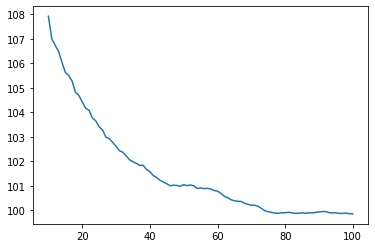

In [157]:
# 5-fold cross validation for a knn Regressor
# typically 5 or 10 fold corss validation
n= 10000
df5 = pd.DataFrame(index=range(n))
df5['age'] = np.random.uniform (18,70, size=n)
df5['income']=(2*df5['age']-0.002*df5['age']**2 + np.random.normal(0,10,size=n))
y_rg = df5['income']
X_rg = df5[['age']]
X_train, X_test, y_train, y_test = train_test_split(X_rg,y_rg,test_size=0.25)

# k_neighbors = {10,11,...,100}
# for loop gives back the the cross validation average error for each k
plot_cv =[]
plot_k =[]
for k in range(10,101):
  knn = KNeighborsRegressor(n_neighbors = k)
  cv = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')*-1
  mean_cv = np.mean(cv)
  plot_cv.append(mean_cv)
  plot_k.append(k)

# prints a diagram showing the average croiss validation error for each k
plt.plot(plot_k,plot_cv)
plt.show();

In [158]:
# find out the minimum k
# + 10 because of the k chosen
# np.argmin gives back the minimum value
np.argmin(plot_cv)+10

100

In [159]:
# calculate the mean squarred error (MSE) for the optimal k
# instead of (np.argmin(plot_cv)+10) use the number of the minmal k
knn_opt = KNeighborsRegressor(n_neighbors=(np.argmin(plot_cv)+10)).fit(X_train,y_train)
predictions = knn_opt.predict(X_test)
MSE(predictions,y_test)


95.9768907780483

In [160]:
# just for comparison: the worst k 
knn_nopt = KNeighborsRegressor(n_neighbors=10).fit(X_train,y_train)
nopt_preds = knn_nopt.predict(X_test)
MSE(nopt_preds,y_test)

102.47170742862235

#ML Decision Trees

In [161]:
# Decision Tree for regression: fit tree and predict
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=181)
rg_dt = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)
rg_dt_preds = rg_dt.predict(X_test)

# print MSE
print('MSE:',MSE(y_test,rg_dt_preds))

MSE: 233.88254038563733


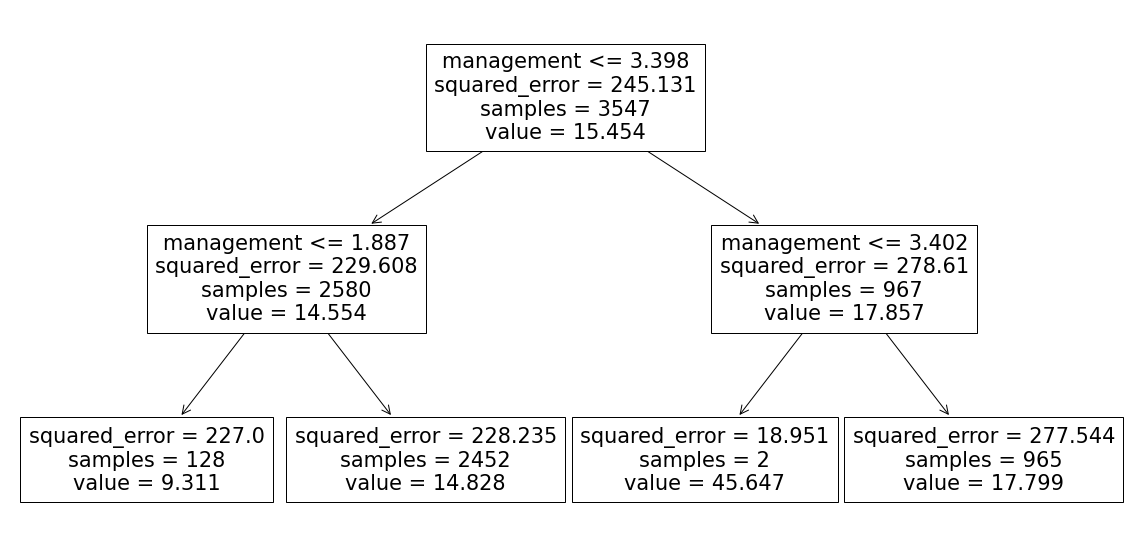

In [162]:
#plot a tree
plt.figure(figsize=(20,10))
tree.plot_tree(rg_dt, feature_names=X_train.columns)
plt.show();

In [163]:
# Decision Tree for classification: fit tree and predict
X_train, X_test, y_train, y_test = train_test_split(X_cl,y_cl,test_size=0.5)
cl_dt = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
cl_dt_preds = cl_dt.predict(X_test)

# print misclassifcation rate (1 - accuracy_score)
print('Misclassification Rate:', 1-accuracy_score(y_test, cl_dt_preds))

Misclassification Rate: 0.01550606146038902


#ML Ensemble Learning

In [164]:
# Bagging --> Random Forest
#regression
# fit a random forest on the training set for a regression problem
X_train, X_test, y_train, y_test = train_test_split(X_rg,y_rg,test_size=0.5)

rf_rg = RandomForestRegressor(n_estimators=1000, max_depth=None, max_features='sqrt', random_state=181, n_jobs=-1)
rf_rg.fit(X_train, y_train)
rf_rg_preds = rf_rg.predict(X_test)

# print MSE
print('MSE:',MSE(y_test,rf_rg_preds))

MSE: 141.70288155184838


In [165]:
# Bagging --> Random Forest
# classification
# fit a random forest on the training set for a classification problem
X_train, X_test, y_train, y_test = train_test_split(X_cl,y_cl,test_size=0.5)

rf_rg = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='sqrt', random_state=181, n_jobs=-1)
rf_rg.fit(X_train, y_train)
rf_rg_preds = rf_rg.predict(X_test)

# print misclassifcation rate (1 - accuracy_score)
print('Misclassification Rate:', 1-accuracy_score(y_test, rf_rg_preds))

Misclassification Rate: 0.014096419509444624


In [166]:
# Boosting --> Gradient Boosting
# Regression problem
# fit a Gradient Boosting Regressor on the training set
X_train, X_test, y_train, y_test = train_test_split(X_rg,y_rg,test_size=0.5)

gb_rg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=181)
gb_rg.fit(X_train, y_train)
gb_rg_preds = gb_rg.predict(X_test)

# print MSE
print('MSE:',MSE(y_test,gb_rg_preds))

MSE: 99.2998033034745


In [167]:
# Boosting --> Gradient Boosting 
# Classification problem
# fit a Gradient Boosting Classifier on the training set
X_train, X_test, y_train, y_test = train_test_split(X_cl,y_cl,test_size=0.5)

gb_cl = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=181)
gb_cl.fit(X_train, y_train)
gb_cl_preds = gb_cl.predict(X_test)

# print misclassifcation rate (1 - accuracy_score)
print('Misclassification Rate:', 1-accuracy_score(y_test, gb_cl_preds))

Misclassification Rate: 0.01466027628982236


#ML Model Selection & Evaluation

**Parameter Grid choices:**

>We vary the **number of features** available to be between 1-9, the **maximum depth** to be between 1 and 100, the **minimum required observations per split and leaf** to be between 1 and 100 in order to decorrelate the trees in our ensemble. We vary the **number of trees** to be between 500-1000 trees to make sure that we have a sufficient amount of them.

In [168]:
path_to_df = 'https://raw.githubusercontent.com/armoutihansen/EEMP2021/main/datasets/data_task2__.csv'
df_rfrg = pd.read_csv(path_to_df)
df_rfrg = df_rfrg.drop(columns=['personid','wage'])
df_rfrg = df_rfrg.dropna()
y_rfrg = df_rfrg['z_performance']
X_rfrg = df_rfrg.drop(columns=['z_performance'])
X_train, X_test, y_train, y_test = train_test_split(X_rfrg,y_rfrg, test_size=0.25, random_state=181)

rf = RandomForestRegressor()

param_grid = {'max_features': np.arange(1, 9), 'max_depth': np.arange(1,100), 'min_samples_split': np.arange(1, 100),
            'min_samples_leaf': np.arange(1, 100), 'n_estimators': np.arange(500, 1001, 100)}

rf_cv = RandomizedSearchCV(rf, param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=-1).fit(X_train,y_train)
print(rf_cv.best_estimator_)

RandomForestRegressor(max_depth=3, max_features=7, min_samples_leaf=10,
                      min_samples_split=86, n_estimators=800)


In [169]:
# data import & manipulation for model selection by CV
path_to_df = 'https://raw.githubusercontent.com/armoutihansen/EEMP2021/main/datasets/Default.csv'
df_ms = pd.read_csv(path_to_df)
df_ms['student'] = pd.get_dummies(df_ms['student'], drop_first =True)
X=df_ms[['balance','income','student']]
y=df_ms['default']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [170]:
# we perform model selection on the training set using ensemble methods --> numer of hyperparameters to choose from
# for the Random Forest --> number of estimators, the number of inputs available for consideration when a decision tree in the ensemble makes a split
# for Gradient Boosting --> number of estimators, maximum depth of each tree in the ensemble
# for Regression use scoring='neg_mean_squared_error'
# for Classification use scoring='accuracy'
# perform model selection by CV in Scikit-Learn:
# always set n_iter=10

# In this case Random Forest Classifier --> use scoring='accuracy'
rf_ms = RandomForestClassifier()
param_grid = {f'n_estimators':np.arange(100,1000),'max_features':np.arange(1,4)}
cv_ms = RandomizedSearchCV(rf_ms, param_grid, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=11).fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [171]:
#print the best estamator
print(cv_ms.best_estimator_)

RandomForestClassifier(max_features=1, n_estimators=343)


In [172]:
# print the MSE of the best estimator
rf_ms_preds = cv_ms.best_estimator_.predict(X_test)
print('MSE:', 1-accuracy_score(y_test,rf_ms_preds))

MSE: 0.02839999999999998


In [173]:
# model interpretation
# access the beta coefficients in a linear regression lr
# to get the intercept (B^0)
print(lr.intercept_)

8.067597828237176


In [174]:
# to get the remaining coefficients ordered as in X_train
print(lr.coef_)

[2.45474075]


In [175]:
# Neccessary for PDP

cv_ms.best_estimator_.fit(X_train, y_train)

RandomForestClassifier(max_features=1, n_estimators=343)

In [176]:
# Partial dependence (PDP)
# One-way PDP tells us how the dependent variable interact with the considered input keeping all other inputs constant.
# Two-way PDP tells us how the dependent variable jointly interact with the two considered inputs keeping all other inputs constant.
# this procedure is similar for gradient boosting and for regression problems

#features = ['balance', 'income']
#PartialDependenceDisplay.from_estimator(cv_ms.best_estimator_, X_train, features, kind='average');

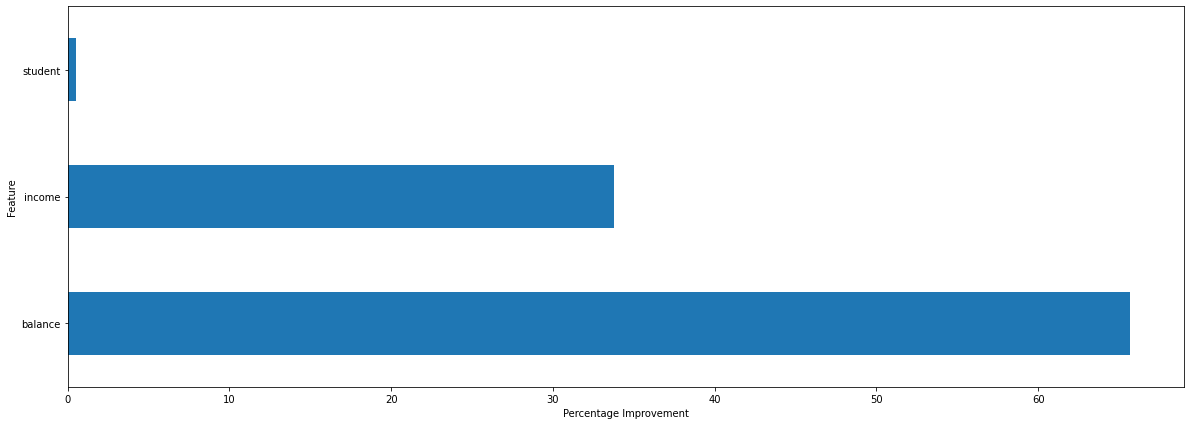

In [177]:
# plot the variable importance
# this procedure is similar for gradient boosting and for regression problems
plt.figure(figsize=(20,7))
fig = pd.Series(cv_ms.best_estimator_.feature_importances_*100, index=X_train.columns).plot(kind='barh')
plt.xlabel('Percentage Improvement')
plt.ylabel('Feature')
plt.show();

In [178]:
# Neccessary for r^2 calculation
y_PDP = df['roce']
X_PDP = df[['management', 'talent', 'emp']]
X_train, X_test, y_train, y_test = train_test_split(X_PDP,y_PDP,test_size=0.5)
lr_r = LinearRegression().fit(X_train, y_train)
lr_r_preds = lr_r.predict(X_test)

# estimate the out-of-sample R^2 for e.g. a linear regression lr
r2_score(y_test, lr_r_preds)

# this method works similar for other regression methods

0.007385034722148465

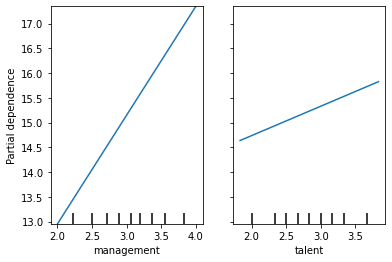

In [179]:
# Partial dependence (PDP)
# One-way PDP tells us how the dependent variable interact with the considered input keeping all other inputs constant.
# Two-way PDP tells us how the dependent variable jointly interact with the two considered inputs keeping all other inputs constant.
# this procedure is similar for gradient boosting and for regression problems

features = ['management', 'talent']
PartialDependenceDisplay.from_estimator(lr_r, X_train, features, kind='average');

#Contents of the Lecture


##Survey Data & Scale Reliability

**Three different types of studies:**


*    Studies based on **observational** data --> e.g. data from surveys
*   **Laboratory** experiments --> e.g. data generated by researches in the lab
*   **Field** experiments --> e.g. Randomized controlled trial (RCT) or A/B tests

**Two types of data:**

*   Administrative data (O-data) --> data from IT-systems on operational processes: directly available through companies ERP-system & rather accurate
*   Survey data (X-data) --> typically data generated through surveys: cheapt to collect & measures subjective perceptions

**How to estimate the causel effect of a given practice?**

*   Randomized Controlled Trial (RCT) (A/B Test)
*   Panel Data --> common trends get visible

**Psychological Construct**

A Psychological construct is a label for a cluster of covarying behaviours or
attitudes (such as job satisfaction, job engagement, but also of personality
traits such as conscientiousness, extraversion, etc.) Typically the item responses are added up to a score and the total score than represents a person's psotition on the construct.

> --> The reliability is increasing with the number of measures








##Regression

Important distinction: **Prediction** and **Causality** --> Two different questions: 

*   Prediction: To what extent does knowing x allow us to predict y?
*   Causality: To what extent does a change of x lead to a change of y?

--> Answering the first (prediction) is typically substantially simpler than
answering the second (causality)


**Conditional Expectation Function (CEF):**


*   CEF = E[Yi|Xi]
*   Useful Interpretation: Think of E[Yi|Xi] as a function stating the mean of Yi among all people who share the same value(s) of Xi
* CEF describes the best minimum mean square error (MMSE) prediction of Yi given Xi


**Important distinction: Population vs Sample** --> we can estimate the population CEF from a representative sample


**Why to use a log in a regression?**


*   logs are less sensitive to outliers & may reduce heteroscedasticity
*   logs sometimes lead to more convenient interpretations

**Summary Regression analyses**


*   Regression provides the best linear predictor for the dependent variable;
the CEF provides the best unrestricted predictor
*   Even if the CEF is non-linear, regressions provide the best linear
approximation
* imposing linearity reduces complexity
+ allows for more accessible interpretations
+ **but:** danger of oversimplification






##Statistical Tests



*   Standard errors reported in regression tables yield the (estimated) standard deviation of the estimated B^
+ The standard errors are used to construct the t-statistics
+ From that we can compute the p-values (reported by statsmodels automatically)


**Intuition:**


*   If I would draw different samples (of the given size) I would obtain different estimators B^ 
+ What is the standard deviation of these B^?
+ When this is small: we are close to the true B
+ When this is large: there is much noise and therefore it is likely that the
estimated B^ is further away from the true B

**What the p-value tells us:**


*   What is the probability of obtaining an estimate that is at least as(distant from 0) as the value of B^j I have estimated when the true value of were B = 0
+ When this probability is smaller (computed using the estimated standard
errors) we can be more certain that the true B is not zero
+ For instance, when p < 0.05 for a certain coefficient, we say that the
coefficient is statistically significant at the 5 % level


##Regression and Causality

**Basic problem** with regressions and causality: we don't know if the causal expectation function (CEF) is causal

**Randomized Controlled Trials (RCT or A/B tests)** eliminate the **selection bias** if the individuals are **randomly** assigned to the treatment

**The Conditional Independce Assumption (CIA)**

*   if the CIA holds --> conditional on X the treatment Ci is independent of potential outcomes 
*   then the difference in conditional expectations has a causal interpretation

**Omitted Variable Bias**

*   if the treatment effect is influenced by another variable the estimate of the causal effect is biased


**Measurement Error**

+ attenuation (=Schwächung) bias --> if a variable has a measurement error the regression underestimates the causal effect

##Panel Data & Fixed Effects

One way to potentially tackle the omitted variable bias (OVB) is **longitudinal data** (=data collected over time) when the omitted factors are stable over time

**Fixed Effect Regressions (Fixed Effect Models):**

*   allow to estimate effects of the explaining variable by eliminating trend effects


Caveats of Fixed Effect Regressions:

*   **Common trend assumption:** You assume that treatment and control group follow the same underlying time trend --> important to keep in mind when interpreting the results of the fixed effects regression causally 
*   Fixed effects can only eliminate **time constant omitted variables**


##Machine Learning

###Unsupervised Learning

+ we observe inputs but no outputs
+ We can seek to understand the relationship between the variables or between the observations
+ Example: Cluster customers into certain groups based on multiple characteristics 


###Supervised Learning

*   The task of learning a function that maps an input to an output based on. example input-output pairs.
+ The learning method learns from a training sample consisting of a set of input-output observations.
*   Two main problems: **regression** & **classification** problems

####Regression

*   Deals with problems in which y is continuous or discrete and ordered
+ Example: predict a house's selling price based on the features (#number of rooms) of it
*   Methods used in this lecture: Linear Regression, K-Nearest-Neighbor (KNN) Regression, Decision Tree Regressor, Random Forest Regressor & Gradient Boosting Regressor
+ metric for evaluating regression methods: **Mean Squarred Error (MSE)**



####Classification

*   Deals with problems in which y takes values in a finite and unordered set
+ Example: Predict whether an employee will leave a company based on his/her age, wage, ...
*   Methods used in this lecture: Logistic Regression, K-Nearest-Neighbor (KNN) Classifier, Decision Tree Classifier, Random Forest Classifier & Gradient Boosting Classifier
+ metric for evaluating classification methods: **Misclassification Rate**


####Parametric vs Non-Parametric methods

*   Parametric methods: make an assumption about the functional form of of f
>+ Advantages:
>>*   less overfitting
>>*   more easy to interpret
*   Non-Parametric methods: No explicit assumptions about the funtional form of f
>+ Advantages
>>* better prediction accuracy


####Model Selection

**Model Selection vs Model assessment**

*   **Model Selection =** estimating the performance of a model with different hyper parameters in order to choose the best one.
*   **Model Assessment =** having chosen a final model, estimating its prediction error (generalization error)


**No Free Lunch Theorem:** No one method dominates all other over all possible data sets 
> --> Model selection is neccessary

*   when it comes to the selection of the best model, the in-sample error provides a poor estimate of a model's general performance --> this is because the selection based on the in-sample error favors complex models that fit the noise in the sample
*   Consequence: It is important to evaluate the model's predictions on a test set
+ **Be aware:** If we use the training data to get an estimate of the regressor's general performance, we are using data that the model already "knows" and was fitted on. Thus, this will generally lead to a too optimistic estimate. Therefore, it is better to use the test data which the model has not "seen" to get the estimate.
+ if we have two models with approximately equal performance --> choose the simpler one of the two because it easier to interpret


**Hyperparameters =** e.g. the number of neighbors for a KNN method.


####Bias-Variance-Tradeoff

The Bias-Variance Tradeoff describes the problem of minimizing two sources of mistakes – the bias and the variance – at the same time. There is an interaction between bias and variance which leads to the dilemma.
> --> Two competing forces

> --> Bias leads to mistakes based on false assupmtions (underfitting)

> --> Variance leads to mistakes based on overfitting the training data

####Cross Validation

+ the error estimates estimates of the validation approach may heavily depend on the splits of the sample --> use cross validation
*   When choosing the number of folds in the CV procedure, we are facing a bias-variance trade-off.
*   If we pick a low number of folds, we will tend to get biased estimate
+ If we choose a high number of folds, our estimates will have high variance.
+ The optimal number of folds depends on the model's learning curve, which is unknown.
+ A often used compromise is to choose k=5 or k=10.

Choosing Hyperparameters with CV:

*   "One standard error rule" --> choose the most parsimonious model with error no more than one standard error above the best error

###Decision Trees

+ versatile ML algorithms that can perform both classification and regression tasks
+ tree-based method that divides the inputs into a number of simple regions
+ Regions (e.g. R1, R2, R3) --> leaves of the tree
+ split points --> internal nodes
+ initial node --> root node
+ segments of the tree that connect the nodes are branches
+ regression decision trees use recursive binary splitting to build the tree
+ classification decision trees use gini index to build the tree
+ **decision trees are simple and easy to interpret**
+ **but also very sensitive to small variations in the data --> instability**


###Ensemble Learning

####Bagging (Bootstrap Aggregating)

+ **Idea:** The effectiveness of using a set of models instead of one is the better the less they are correlated. In turn this lowers the variance of our estimate.
+ One way to decrease the variance would be to train a set of models from
the same method (e.g.a Decision Tree) on B different training samples drawn from the population
+ for regression problems the estimates of the singles methods are averraged
+ for classification problems there is majority voting
+ individual decision trees have a high variance but a low bias --> averaging then lowers the variance

**Random Forest**

*   ensemble of decision trees that are generally trained via the bagging method
*   Difference between bagged trees and RF: The fundamental difference is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.

> Most important hyperparameters for RF:
+ number of estimators
+ number of inputs available for consideration when a decision tree in the ensemble makes a split

> Most important hyperparameters for RF Regressor:
+ (a) the number of trees
+ (b) the number of features available to each tree when making a split
+ (c) the maximum depth of each tree in the ensemble
+ (d) the minimum required observations per split
+ (e) the minimum required observations per leaf.

####Boosting

+ Combine several weak lerners into one strong learner
>+ Weak lerner: computionally model that performs slightly above chance
+ Idea: Train models sequentially on the (modified) training data, where each succeeding model tries to correct its predecessor
+ in general, models that learn slowly tend to perform well


**Gradient Boosting**

*   GB works by sequentially adding models to an ensemble
*   each of the models attepts to correct for its predecessor
*   One may then stop the collection if no further improvement is observed 
for several rounds, or once a certain number of trees have been reached

> Most important hyperparameters for GB
+ number of estimators
+ maximum depth of each tree in the ensemble

###Remark Classification Errors


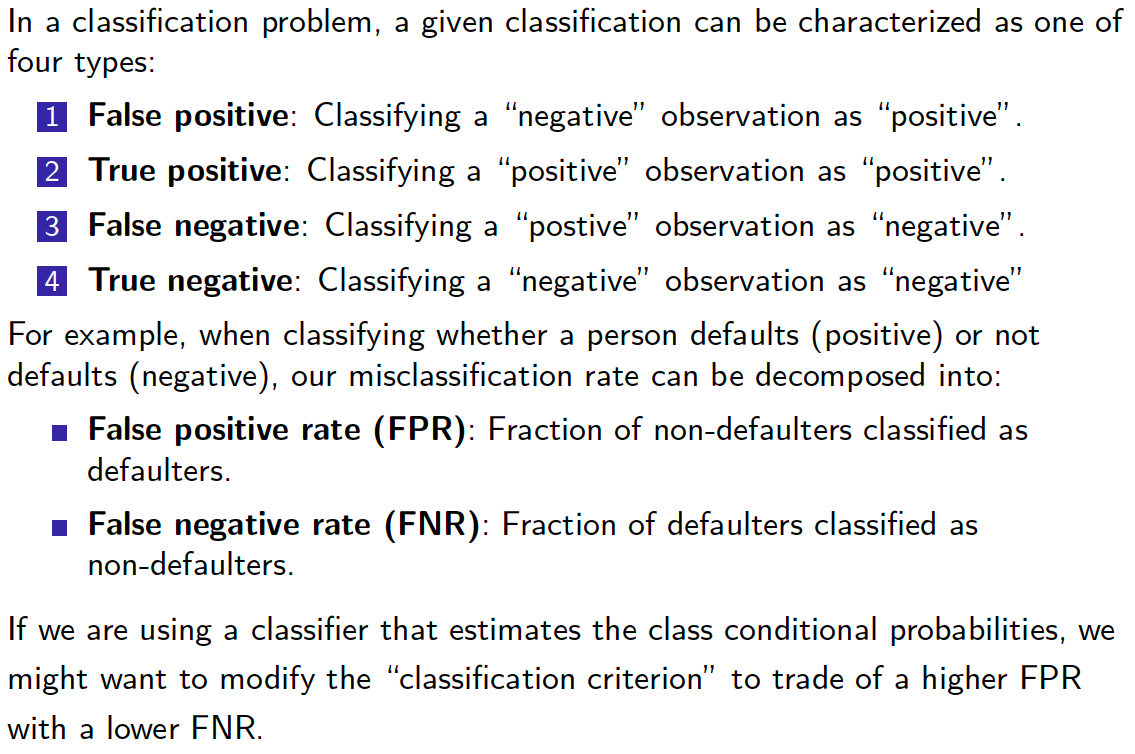

